# This is a sample Jupyter Notebook

Below is an example of a code cell.
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [1]:
!git clone -b JEAN_MOLINA https://github.com/Bryan810/Grupo_9_tarea_3.git
%cd /content/Grupo_9_tarea_3
!git branch -vv
!git config user.name "carlosmolina2007-gif"
!git config user.email "carlosmolina2007@hotmail.com"
!git config -l | sed -n 's/^user\./user./p'
from getpass import getpass
import os
os.environ["GITHUB_TOKEN"] = getpass("Pegar aquí tu token: ")

Cloning into 'Grupo_9_tarea_3'...
remote: Enumerating objects: 56, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 56 (delta 24), reused 40 (delta 12), pack-reused 0 (from 0)
Receiving objects: 100% (56/56), 4.55 MiB | 2.16 MiB/s, done.
Resolving deltas: 100% (24/24), done.
/content/Grupo_9_tarea_3
* JEAN_MOLINA c454f4a [origin/JEAN_MOLINA] Se creó con Colab
user.name=carlosmolina2007-gif
user.email=carlosmolina2007@hotmail.com
Pegar aquí tu token: ··········


In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import folium
import numpy as np
import webbrowser

df = pd.read_csv("data/Global_Cybersecurity_Threats_2015-2024.csv")

# Mostrar las primeras filas
df.head()

# df.shape

# df.info()

# df.describe()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


**Análisis de perdidas en millones de dolares**

In [ ]:
df.groupby("Attack Type")["Financial Loss (in Million $)"].agg(["mean","sum","count"]).sort_values("sum", ascending=False)

,mean,sum,count
Attack Type,,,
DDoS,52.035631,27630.92,531
Phishing,50.459905,26693.29,529
SQL Injection,50.013042,25156.56,503
Ransomware,49.653793,24479.32,493
Malware,49.418454,23967.95,485
Man-in-the-Middle,51.309085,23550.87,459


**Análisis de numero de usuarios afectados**

In [ ]:
df.groupby("Target Industry")["Number of Affected Users"].agg(["mean","sum","count"]).sort_values("sum", ascending=False)

,mean,sum,count
Target Industry,,,
IT,523210.939331,250094829,478
Banking,505839.114607,225098406,445
Healthcare,504130.340326,216271916,429
Education,513137.785203,215004732,419
Retail,488833.063830,206776386,423
Government,499352.431762,201239030,403
Telecommunications,495203.746898,199567110,403


**Análisis de paises afectados y tipo de ataque**

In [ ]:
df.groupby(["Country", "Attack Type"])["Number of Affected Users"].agg(["mean", "sum", "count"]).sort_values("sum", ascending=False)


mean       sum  count
Country   Attack Type                                      
Australia Malware            556724.918033  33960220     61
Brazil    SQL Injection      583464.298246  33257465     57
Russia    Ransomware         571451.465517  33144185     58
Brazil    DDoS               530026.196721  32331598     61
Germany   SQL Injection      519746.629032  32224291     62
Australia DDoS               519355.622951  31680693     61
France    Phishing           475132.734375  30408495     64
          SQL Injection      529777.472727  29137761     55
          DDoS               580843.960000  29042198     50
USA       DDoS               476822.733333  28609364     60
Brazil    Ransomware         655131.465116  28170653     43
UK        Phishing           437743.515625  28015585     64
          Man-in-the-Middle  562555.040816  27565197     49
Brazil    Malware            539784.862745  27529028     51
UK        Malware            517266.622642  27415131     53
Japan     Malware            554732.653061  27181900     49
USA       Phishing           501867.814815  27100862     54
India     Man-in-the-Middle  577573.956522  26568402     46
          Ransomware         449016.644068  26491982     59
          SQL Injection      477627.963636  26269538     55
          Phishing           511881.450980  26105954     51
UK        SQL Injection      527784.122449  25861422     49
Japan     Phishing           451760.596491  25750354     57
USA       Ransomware         485111.698113  25710920     53
Russia    SQL Injection      523638.653061  25658294     49
          DDoS               470020.388889  25381101     54
China     DDoS               525336.250000  25216140     48
          Phishing           511560.448980  25066462     49
Brazil    Phishing           463813.148148  25045910     54
Japan     Man-in-the-Middle  455071.690909  25028943     55
Germany   Man-in-the-Middle  506839.836735  24835152     49
UK        DDoS               448415.309091  24662842     55
Japan     SQL Injection      454068.240741  24519685     54
France    Ransomware         479574.117647  24458280     51
Japan     DDoS               494183.183673  24214976     49
Russia    Phishing           615718.641026  24013027     39
          Man-in-the-Middle  488841.591837  23953238     49
UK        Ransomware         469506.000000  23944806     51
Germany   Phishing           517837.239130  23820513     46
China     Ransomware         456682.411765  23290803     51
Germany   DDoS               528250.790698  22714784     43
China     Man-in-the-Middle  515405.181818  22677828     44
Germany   Malware            502071.088889  22593199     45
Australia Man-in-the-Middle  500420.200000  22518909     45
France    Malware            478693.276596  22498584     47
Brazil    Man-in-the-Middle  510734.681818  22472326     44
USA       Man-in-the-Middle  560142.600000  22405704     40
India     Malware            476493.914894  22395214     47
Australia Phishing           439035.549020  22390813     51
China     Malware            505322.477273  22234189     44
Japan     Ransomware         536974.536585  22015956     41
Germany   Ransomware         467117.804348  21487419     46
India     DDoS               426951.380000  21347569     50
China     SQL Injection      468789.244444  21095516     45
USA       Malware            497832.333333  20908958     42
France    Man-in-the-Middle  544311.157895  20683824     38
Australia SQL Injection      520084.410256  20283292     39
Russia    Malware            435695.434783  20041990     46
USA       SQL Injection      512238.473684  19465062     38
Australia Ransomware         479447.575000  19177903     40

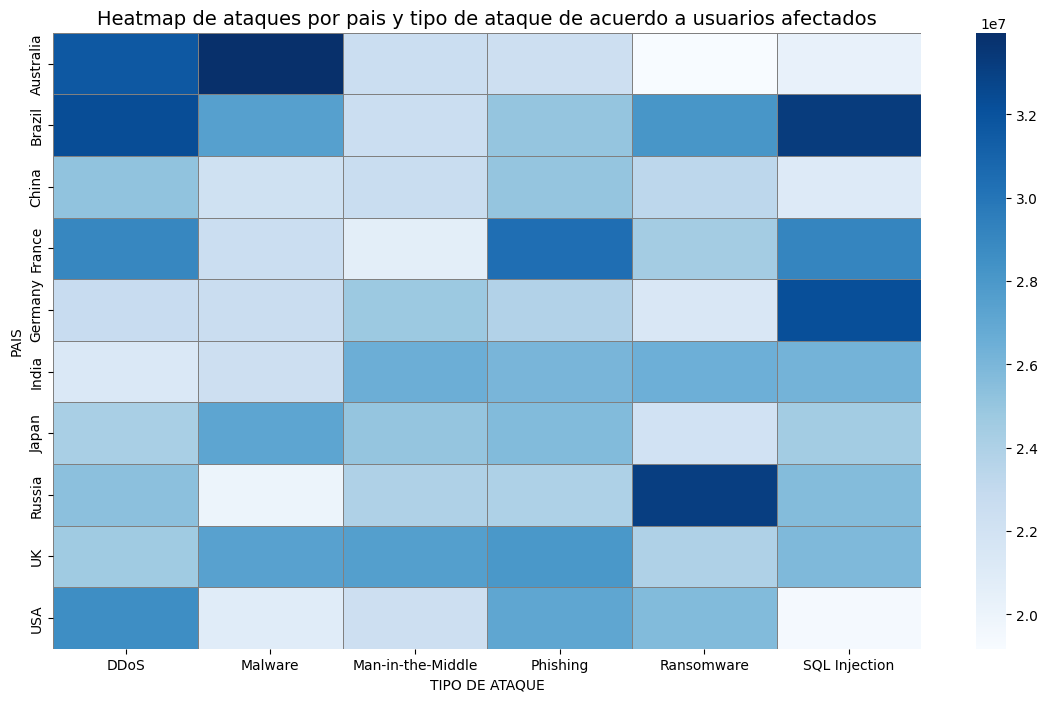

In [ ]:
country_attack_stats = (
    df.groupby(["Country", "Attack Type"])["Number of Affected Users"]
      .sum()
      .reset_index()
)

table = country_attack_stats.pivot(index="Country", columns="Attack Type", values="Number of Affected Users").fillna(0)

plt.figure(figsize=(14,8))
sns.heatmap(
    table,
    cmap="Blues",
    linewidths=0.5,
    linecolor="gray"
)
plt.title("Heatmap de ataques por pais y tipo de ataque de acuerdo a usuarios afectados", fontsize=14)
plt.xlabel("TIPO DE ATAQUE")
plt.ylabel("PAIS")
plt.show()


Con los histogramas muestro cómo se distribuyen las variables numéricas del dataset, lo que me permite identificar concentraciones de datos, sesgos en la distribución y posibles patrones en las pérdidas económicas o en el número de usuarios afectados.\

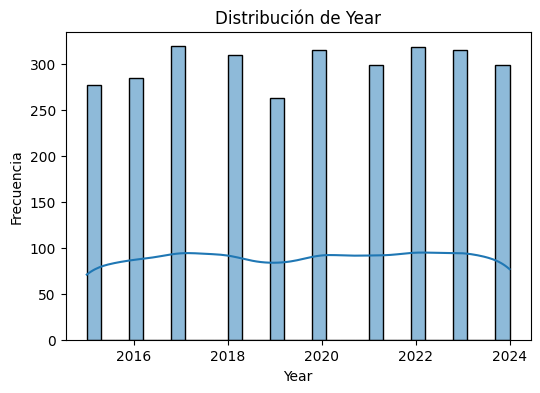

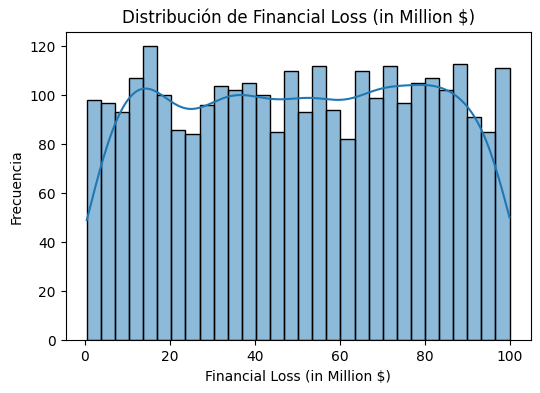

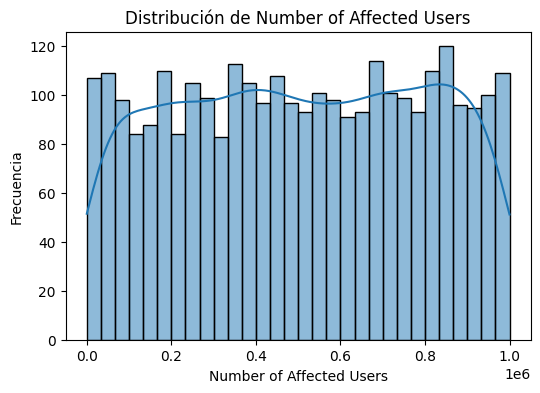

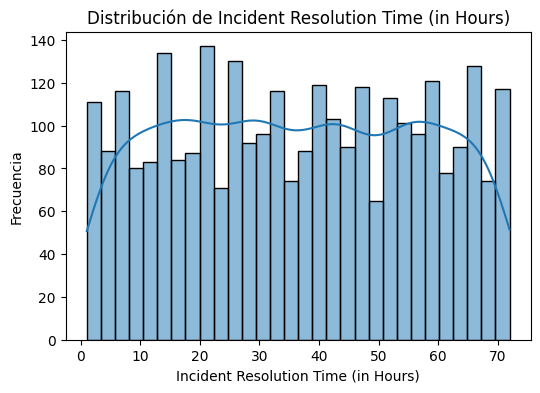

In [ ]:
# Seleccionar columnas numéricas
num_cols = df.select_dtypes(include=np.number).columns

# Graficar histogramas para cada variable numérica
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

Con los boxplots puedo detectar fácilmente valores atípicos en las métricas analizadas; estos outliers representan casos extremos de pérdidas o de usuarios comprometidos que sobresalen del comportamiento general.

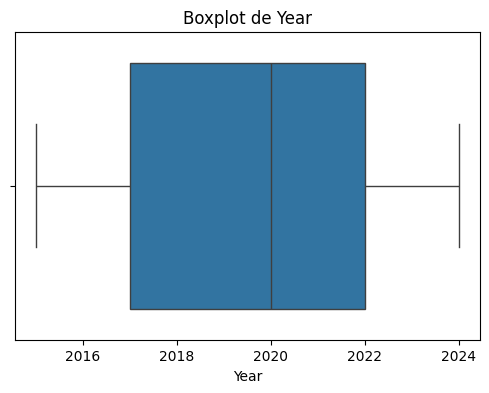

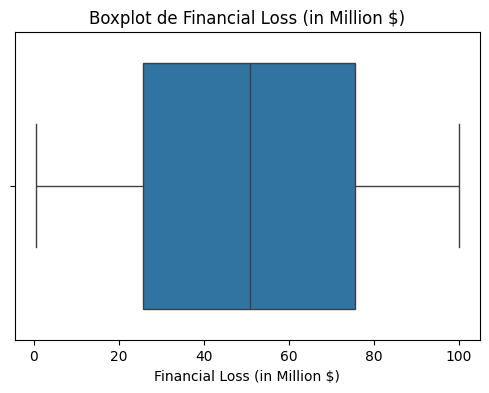

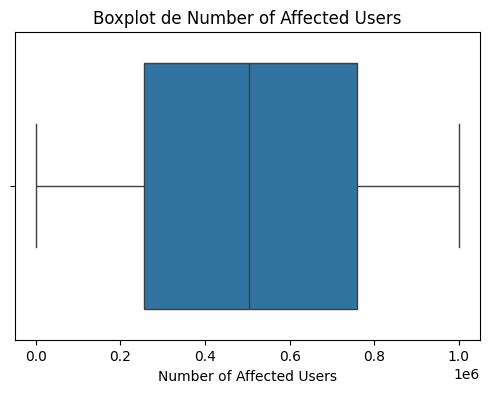

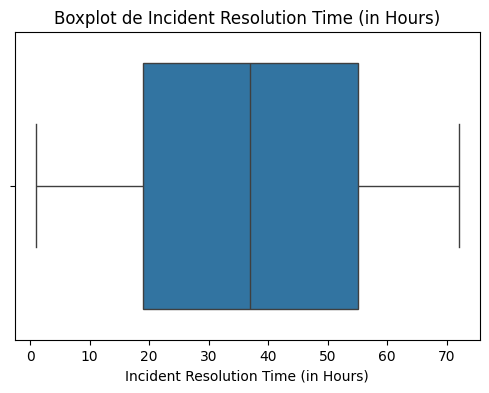

In [ ]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")
    plt.xlabel(col)
    plt.show()

**Al graficar la tendencia por año, logro observar la evolución tanto de las pérdidas financieras como del número de usuarios afectados, lo que me permite analizar cómo han cambiado estos indicadores a lo largo del tiempo.**

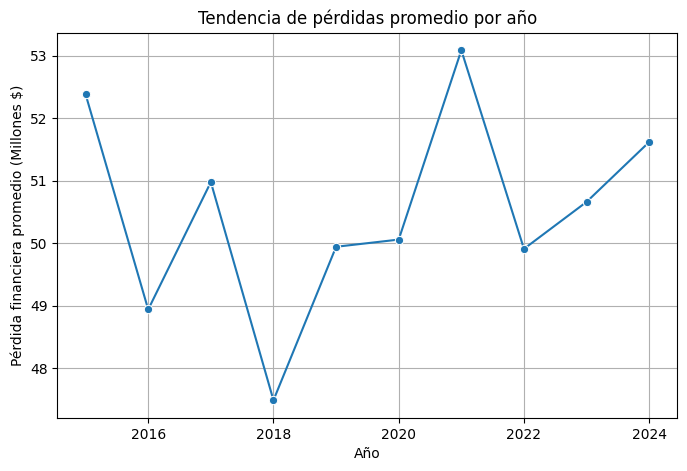

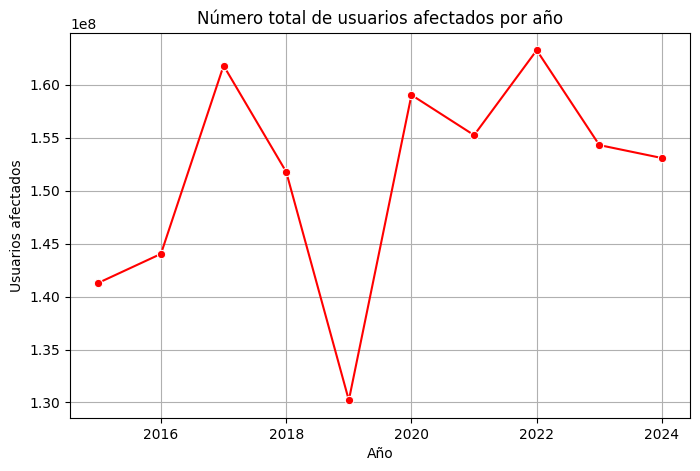

In [ ]:
if "Year" in df.columns:
    # Promedio de pérdidas por año
    yearly_loss = df.groupby("Year")["Financial Loss (in Million $)"].mean()

    plt.figure(figsize=(8,5))
    sns.lineplot(x=yearly_loss.index, y=yearly_loss.values, marker="o")
    plt.title("Tendencia de pérdidas promedio por año")
    plt.xlabel("Año")
    plt.ylabel("Pérdida financiera promedio (Millones $)")
    plt.grid(True)
    plt.show()

    # Número total de usuarios afectados por año
    yearly_users = df.groupby("Year")["Number of Affected Users"].sum()

    plt.figure(figsize=(8,5))
    sns.lineplot(x=yearly_users.index, y=yearly_users.values, marker="o", color="red")
    plt.title("Número total de usuarios afectados por año")
    plt.xlabel("Año")
    plt.ylabel("Usuarios afectados")
    plt.grid(True)
    plt.show()

Con el scatterplot analizo la relación entre la cantidad de usuarios afectados y las pérdidas financieras, distinguiendo además cada tipo de ataque, lo que facilita detectar si existe correlación directa entre ambas variables.

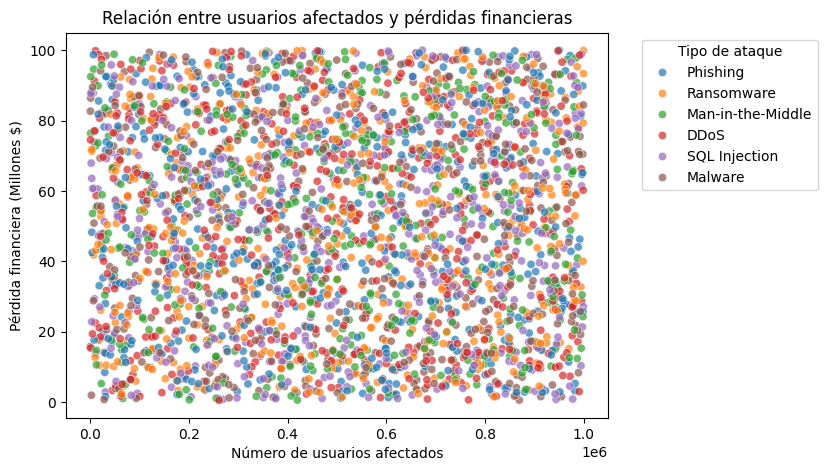

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,
                x="Number of Affected Users",
                y="Financial Loss (in Million $)",
                hue="Attack Type", alpha=0.7)
plt.title("Relación entre usuarios afectados y pérdidas financieras")
plt.xlabel("Número de usuarios afectados")
plt.ylabel("Pérdida financiera (Millones $)")
plt.legend(title="Tipo de ataque", bbox_to_anchor=(1.05,1), loc="upper left")
plt.show()

In [ ]:
!git add .
!git commit -m "Actualización de sample.ipynb desde Colab"
!git push origin JEAN_MOLINA

On branch JEAN_MOLINA
Your branch is up to date with 'origin/JEAN_MOLINA'.

nothing to commit, working tree clean
Everything up-to-date


In [ ]:
import pandas as pd, numpy as np, pathlib, seaborn as sns, matplotlib.pyplot as plt
DATA = pathlib.Path("data"); DOCS = pathlib.Path("docs"); DOCS.mkdir(exist_ok=True)

df = pd.read_csv(DATA/"Global_Cybersecurity_Threats_2015-2024.csv")

# Normalizar columnas
df.columns = (df.columns.str.strip()
                        .str.replace(" ", "_")
                        .str.lower())
rename = {
    "financial_loss_(in_million_$)": "loss_musd",
    "number_of_affected_users": "n_users",
    "attack_type": "attack_type",
    "target_industry": "target_industry",
    "country": "country",
    "year": "year",
}
df = df.rename(columns={k:v for k,v in rename.items() if k in df.columns})

# Tipos y nulos
for c in ["year","loss_musd","n_users"]:
    if c in df.columns: df[c] = pd.to_numeric(df[c], errors="coerce")
df = df.drop_duplicates()
for c in df.select_dtypes(include=np.number):
    df[c] = df[c].fillna(df[c].median())

# Guardar limpio
df.to_csv(DATA/"threats_clean.csv", index=False)

In [ ]:
if {"attack_type","loss_musd"}.issubset(df.columns):
    f = (df.groupby("attack_type")["loss_musd"].sum()
           .sort_values(ascending=False))
    plt.figure(figsize=(7,4)); f.plot(kind="bar"); plt.title("Pérdida total por tipo de ataque (MUSD)")
    plt.ylabel("MUSD"); plt.xlabel("Tipo de ataque"); plt.tight_layout()
    plt.savefig(DOCS/"loss_por_attacktype.png", bbox_inches="tight"); plt.close()

In [ ]:
if {"target_industry","n_users"}.issubset(df.columns):
    u = (df.groupby("target_industry")["n_users"].sum()
           .sort_values(ascending=False))
    plt.figure(figsize=(7,4)); u.plot(kind="bar"); plt.title("Usuarios afectados por industria")
    plt.ylabel("Usuarios"); plt.xlabel("Industria"); plt.tight_layout()
    plt.savefig(DOCS/"users_por_industry.png", bbox_inches="tight"); plt.close()

In [ ]:
if {"year","loss_musd"}.issubset(df.columns):
    t = df.groupby("year")["loss_musd"].mean()
    plt.figure(figsize=(7,4)); sns.lineplot(x=t.index, y=t.values, marker="o")
    plt.title("Tendencia anual de pérdidas promedio (MUSD)")
    plt.xlabel("Año"); plt.ylabel("MUSD"); plt.grid(True); plt.tight_layout()
    plt.savefig(DOCS/"trend_loss_year.png", bbox_inches="tight"); plt.close()

In [ ]:
corr = df.select_dtypes(include=np.number).corr()
plt.figure(figsize=(6,5)); sns.heatmap(corr, cmap="coolwarm")
plt.title("Matriz de correlación"); plt.tight_layout()
plt.savefig(DOCS/"corr_matrix.png", bbox_inches="tight"); plt.close()

In [ ]:
if {"loss_musd","n_users"}.issubset(df.columns):
    plt.figure(figsize=(6,5))
    sns.scatterplot(data=df, x="n_users", y="loss_musd", hue=df.get("attack_type"))
    plt.title("Relación usuarios afectados vs pérdidas (MUSD)")
    plt.xlabel("Usuarios"); plt.ylabel("MUSD"); plt.tight_layout()
    plt.savefig(DOCS/"scatter_users_loss.png", bbox_inches="tight"); plt.close()

print("Listo: data/threats_clean.csv y figuras en docs/")

Listo: data/threats_clean.csv y figuras en docs/


In [4]:
%cd /content/Grupo_9_tarea_3
!git fetch origin
!git pull --rebase origin JEAN_MOLINA

/content/Grupo_9_tarea_3
From https://github.com/Bryan810/Grupo_9_tarea_3
 * branch            JEAN_MOLINA -> FETCH_HEAD
Already up to date.


In [5]:
!git push origin JEAN_MOLINA

fatal: could not read Username for 'https://github.com': No such device or address


In [ ]:
!git log --oneline -5

e9a3364 (HEAD -> JEAN_MOLINA, origin/JEAN_MOLINA) Limpieza + EDA + figuras (cuaderno actualizado)
feb5841 Se creó con Colab
c4a0bda Actualización desde Colab
2c28924 data analysis
bbfe7de data analysis


Experimento 1: Detección de anomalías (IsolationForest)

Objetivo: encontrar casos “atípicos” por pérdidas/usuarios

In [2]:
import pandas as pd, numpy as np, pathlib, matplotlib.pyplot as plt, seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

DATA = pathlib.Path("data"); DOCS = pathlib.Path("docs"); DOCS.mkdir(exist_ok=True)
df = pd.read_csv(DATA/"threats_clean.csv")

# Columnas posibles (usa las que existan)
num_feats = [c for c in ["loss_musd","n_users","year"] if c in df.columns]
X = df[num_feats].dropna()

scaler = StandardScaler()
Xs = scaler.fit_transform(X)

iso = IsolationForest(n_estimators=200, contamination="auto", random_state=42)
pred = iso.fit_predict(Xs)        # -1 = anómalo, 1 = normal

df["anomaly"] = 1
df.loc[X.index, "anomaly"] = pred
anoms = df[df["anomaly"]==-1].copy()
print("Anomalías detectadas:", anoms.shape[0])

# Guardar resultados
anoms.to_csv(DATA/"threats_anomalies.csv", index=False)

# Visual (si existen columnas)
if {"n_users","loss_musd"}.issubset(df.columns):
    plt.figure(figsize=(7,5))
    sns.scatterplot(data=df, x="n_users", y="loss_musd", hue=(df["anomaly"]==-1), alpha=.7)
    plt.title("Anomalías: usuarios vs pérdidas (IsolationForest)")
    plt.xlabel("Usuarios afectados"); plt.ylabel("Pérdida (MUSD)")
    plt.legend(["Normal","Anómalo"])
    plt.tight_layout(); plt.savefig(DOCS/"iforest_scatter.png", bbox_inches="tight"); plt.close()

print("OK → data/threats_anomalies.csv y docs/iforest_scatter.png")

Anomalías detectadas: 2076
OK → data/threats_anomalies.csv y docs/iforest_scatter.png


Experimento 2: Predicción de pérdidas (Regresión)

Objetivo: predecir loss_musd con el resto de variables.

In [3]:
# === Predicción de pérdidas (RandomForest + Pipeline) ===
import pandas as pd, numpy as np, json, pathlib, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

DATA = pathlib.Path("data"); DOCS = pathlib.Path("docs"); DOCS.mkdir(exist_ok=True)
df = pd.read_csv(DATA/"threats_clean.csv")

assert "loss_musd" in df.columns, "No existe la columna 'loss_musd' en threats_clean.csv"

# Posibles features
num_cols = [c for c in ["n_users","year"] if c in df.columns]
cat_cols = [c for c in ["attack_type","target_industry","country"] if c in df.columns]

X = df[num_cols + cat_cols].copy()
y = df["loss_musd"].copy()

# Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pre = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ],
    remainder="drop",
)

pipe = Pipeline(steps=[
    ("prep", pre),
    ("model", RandomForestRegressor(random_state=42, n_jobs=-1))
])

param_grid = {
    "model__n_estimators": [200, 400],
    "model__max_depth": [None, 10, 20]
}

gs = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, scoring="neg_mean_absolute_error", verbose=0)
gs.fit(X_train, y_train)

best = gs.best_estimator_
pred = best.predict(X_test)

mae = mean_absolute_error(y_test, pred)
r2  = r2_score(y_test, pred)
print(f"MAE: {mae:.3f} MUSD | R²: {r2:.3f}")

# Guardar métricas y predicciones
metrics = {"MAE_MUSD": float(mae), "R2": float(r2), "best_params": gs.best_params_}
with open(DOCS/"ml_regression_metrics.json","w") as f: json.dump(metrics, f, indent=2)

out = X_test.copy()
out["y_true_loss_musd"] = y_test
out["y_pred_loss_musd"] = pred
out["residual"] = out["y_true_loss_musd"] - out["y_pred_loss_musd"]
out.to_csv(DATA/"predicciones_loss.csv", index=False)

# Gráficos
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=pred, alpha=.7)
plt.xlabel("Real (MUSD)"); plt.ylabel("Predicho (MUSD)")
plt.title("Real vs Predicho (RandomForest)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "--")
plt.tight_layout(); plt.savefig(DOCS/"rf_actual_vs_pred.png", bbox_inches="tight"); plt.close()

print("OK → docs/ml_regression_metrics.json, docs/rf_actual_vs_pred.png y data/predicciones_loss.csv")


MAE: 24.630 MUSD | R²: -0.015
OK → docs/ml_regression_metrics.json, docs/rf_actual_vs_pred.png y data/predicciones_loss.csv


In [6]:
%cd /content/Grupo_9_tarea_3
!git status

/content/Grupo_9_tarea_3
On branch JEAN_MOLINA
Your branch is up to date with 'origin/JEAN_MOLINA'.

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	data/predicciones_loss.csv
	data/threats_anomalies.csv
	docs/iforest_scatter.png
	docs/ml_regression_metrics.json
	docs/rf_actual_vs_pred.png

nothing added to commit but untracked files present (use "git add" to track)


In [7]:
%cd /content/Grupo_9_tarea_3
!git add data/predicciones_loss.csv data/threats_anomalies.csv docs/iforest_scatter.png docs/ml_regression_metrics.json docs/rf_actual_vs_pred.png
!git commit -m "ML: IsolationForest + RandomForest (outputs y métricas)"
!git push https://$GITHUB_TOKEN@github.com/Bryan810/Grupo_9_tarea_3.git JEAN_MOLINA

/content/Grupo_9_tarea_3
[JEAN_MOLINA 22db67b] ML: IsolationForest + RandomForest (outputs y métricas)
 5 files changed, 2686 insertions(+)
 create mode 100644 data/predicciones_loss.csv
 create mode 100644 data/threats_anomalies.csv
 create mode 100644 docs/iforest_scatter.png
 create mode 100644 docs/ml_regression_metrics.json
 create mode 100644 docs/rf_actual_vs_pred.png
Enumerating objects: 12, done.
Counting objects: 100% (12/12), done.
Delta compression using up to 2 threads
Compressing objects: 100% (9/9), done.
Writing objects: 100% (9/9), 434.34 KiB | 3.78 MiB/s, done.
Total 9 (delta 3), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/Bryan810/Grupo_9_tarea_3.git
   c454f4a..22db67b  JEAN_MOLINA -> JEAN_MOLINA
